# Image exploration and analysis

<img height="240" src="../Graphics/EDA/sample 744.png" width="240"/>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import os
import seaborn as sns
sns.set()
import re

### Read images and metadata

In [4]:
imagepath = r'C:\Users\dimka\Documents\Dermoscopy_Dataset\datasets\All BCC'

df = pd.read_csv('prepared_dataset.csv')
df.head()

,Unnamed: 0,Sex,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Age 60-70,Age 70-80,Age 80-90,Age 90+,Basosquamous,Infiltrating,Micronodular,Morphea,Superficial,Low Risk
0,0,0,0,1,0,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,4,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
train_df = df.loc[:, 'Sex':'Age 90+']
labels_df = df.loc[:, 'Basosquamous':'Low Risk']

### Check the number of samples in each class

In [6]:
df_columns = df.columns
for column in df_columns:
    print(f"The class {column} has {df[column].sum()} samples")

The class Unnamed: 0 has 354061 samples
The class Sex has 343 samples
The class Feature 0 has 119 samples
The class Feature 1 has 91 samples
The class Feature 2 has 28 samples
The class Feature 3 has 372 samples
The class Feature 4 has 436 samples
The class Feature 5 has 326 samples
The class Feature 6 has 157 samples
The class Feature 7 has 343 samples
The class Feature 8 has 268.0 samples
The class Feature 9 has 296 samples
The class Head/Neck has 531 samples
The class Trunk has 263 samples
The class Upper Extremities has 28 samples
The class Lower Extremities has 20 samples
The class Age 0-30 has 2 samples
The class Age 30-40 has 23 samples
The class Age 40-50 has 79 samples
The class Age 50-60 has 100 samples
The class Age 60-70 has 206 samples
The class Age 70-80 has 237 samples
The class Age 80-90 has 180 samples
The class Age 90+ has 15 samples
The class Basosquamous has 21 samples
The class Infiltrating has 53 samples
The class Micronodular has 21 samples
The class Morphea has 

### Add the images to the dataframe

In [7]:
def str_to_numb(string_list):
    """

    :param x: list with of all the numbers
    :return: numbers missing
    """
    number_list = []
    for string in string_list:
        number = re.findall(r'\d+', string)
        number_list.append(int(number[0].strip()))
    # number_list.sort()
    return number_list

def check_for_missing_values(file_list, **kwargs):

    entries = str_to_numb(file_list)

    if 'length' in kwargs.keys:
        diff = len(entries) - kwargs['length']
    elif 'data' in kwargs.keys():
        diff = len(entries) - len(kwargs['data'])
    else:
        raise TypeError(f"At least one of 'length' or 'data' arguments must be passed")

    if diff < 0:
        print(f"There are {-diff} files missing")
    elif diff > 0:
        print(f"There are {diff} files with missing data")
    else:
        print("No files/values are missing")
        exit()

    j=0
    missing_values = []
    for entry in entries:
        if entry != (j + 1):
            missing_locally = abs(entry - (j+1))
            missing_values.append(range(missing_locally))
            j += missing_locally
        j += 1

    print(f"The")


entries = os.listdir(imagepath)
entries.sort(key=len)
img_numbers = str_to_numb(entries)
img_paths = []
j = 0
gegen = j + 1
for entry in entries:
    if img_numbers[j] == gegen:
        img_paths.append(os.path.join(imagepath, entry))
        gegen += 1
    else:
        print(f"Warning: picture {j + 1} is missing from the dataset")
        img_paths.append('None')
        img_paths.append(os.path.join(imagepath, entry))
        gegen += 2
    j += 1

df['Image Paths'] = img_paths


In [8]:
images = df['Image Paths'].values
random_images = [np.random.choice(images) for i in range(9)]

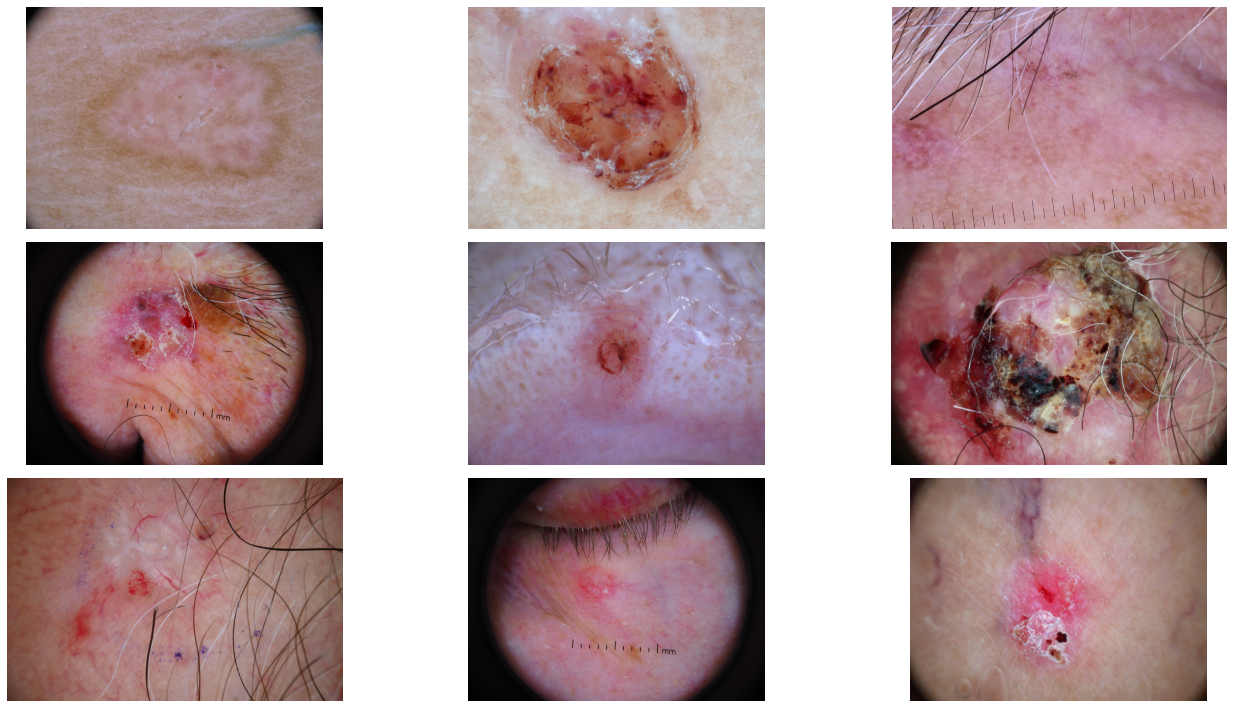

In [9]:
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(random_images[i])
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()

The dimensions of the image are 3312 pixels width and 4416 pixels height, one single color channel
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 139.1953 and the standard deviation is 31.1355


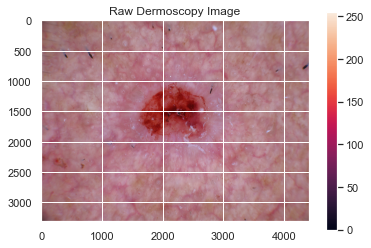

In [10]:
sample_img = df['Image Paths'][0]
raw_image = plt.imread(sample_img)
plt.imshow(raw_image)
plt.colorbar()
plt.title('Raw Dermoscopy Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

G:\My Drive\Libraries\Python\Environment\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

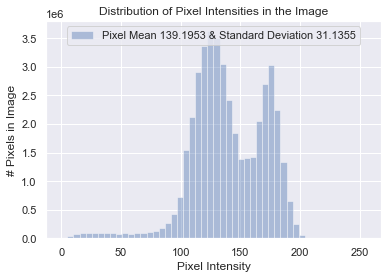

In [11]:
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(),
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [13]:
import tensorflow as tf
# import tensorflow_datasets as tfds

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [15]:
print(tf.__version__)
import pathlib

2.9.1


In [16]:
data_dir = pathlib.Path(imagepath)

In [19]:
image_count = len(list(data_dir.glob('*.jpg')))

842

In [21]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*'), shuffle=False)

In [22]:
for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\1.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\10.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\100.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\101.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\102.jpg'


In [24]:
img_ds = tf.data.Dataset.from_tensor_slices(df.iloc[[1, 3, 5, 8, 10], -1] )

In [25]:
for f in img_ds.take(5):
  print(f.numpy())

b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\2.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\4.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\6.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\9.jpg'
b'C:\\Users\\dimka\\Documents\\Dermoscopy_Dataset\\datasets\\All BCC\\11.jpg'


In [84]:
cc = ImageDataset('C:\\Users\\dimka\\Documents\\Alumil')

ValueError: Attempt to convert a value (<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>) to a Tensor.

In [76]:
search_type = '*/*'
data_dir = pathlib.Path('C:\\Users\\dimka\\Documents\\Alumil')
print(str(data_dir/search_type))
print(str(data_dir/'*/*'))

C:\Users\dimka\Documents\Alumil\*\*
C:\Users\dimka\Documents\Alumil\*\*


In [78]:
cc = tf.data.Dataset.list_files(str(data_dir/search_type), shuffle=False)

In [79]:
for f in cc.take(5):
  print(f.numpy())

b'C:\\Users\\dimka\\Documents\\Alumil\\dandelions\\1.txt'
b'C:\\Users\\dimka\\Documents\\Alumil\\dandelions\\2.txt'
b'C:\\Users\\dimka\\Documents\\Alumil\\ferns\\1.txt'
b'C:\\Users\\dimka\\Documents\\Alumil\\ferns\\2.txt'
b'C:\\Users\\dimka\\Documents\\Alumil\\lillies\\1.txt'
